In [1]:
from scipy.spatial.transform import Rotation as R
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pywavefront
import os
from pathlib import Path

In [2]:
from LightTransportSimulator.RayVectors.utils import nearest_intersected_object
from LightTransportSimulator.RayVectors.intersects import sphere_intersect
from LightTransportSimulator.RayVectors.vectors import *
from LightTransportSimulator.RayVectors.rays import *

In [23]:
path = Path("../examples/cube.obj").resolve()

In [24]:
scene = pywavefront.Wavefront(
    path,
    create_materials=True,
    collect_faces=True
)

In [25]:
print("Faces:", scene.mesh_list[0].faces)

Faces: [[0, 1, 2], [3, 0, 2], [7, 6, 5], [4, 7, 5], [3, 2, 6], [7, 3, 6], [4, 0, 3], [7, 4, 3], [4, 5, 1], [0, 4, 1], [1, 5, 6], [2, 1, 6]]


In [26]:
print("Vertices:", scene.vertices)

Vertices: [(0.0, 2.0, 2.0), (0.0, 0.0, 2.0), (2.0, 0.0, 2.0), (2.0, 2.0, 2.0), (0.0, 2.0, 0.0), (0.0, 0.0, 0.0), (2.0, 0.0, 0.0), (2.0, 2.0, 0.0)]


In [27]:
print("Format:", scene.mesh_list[0].materials[0].vertex_format)

Format: V3F


In [28]:
print("Vertices:", scene.mesh_list[0].materials[0].vertices)

Vertices: [0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0]


In [29]:
scene.mesh_list[0].faces

[[0, 1, 2],
 [3, 0, 2],
 [7, 6, 5],
 [4, 7, 5],
 [3, 2, 6],
 [7, 3, 6],
 [4, 0, 3],
 [7, 4, 3],
 [4, 5, 1],
 [0, 4, 1],
 [1, 5, 6],
 [2, 1, 6]]

In [30]:
for mesh in scene.mesh_list:
    print(mesh.faces)

[[0, 1, 2], [3, 0, 2], [7, 6, 5], [4, 7, 5], [3, 2, 6], [7, 3, 6], [4, 0, 3], [7, 4, 3], [4, 5, 1], [0, 4, 1], [1, 5, 6], [2, 1, 6]]


In [31]:
camera = np.array([0, 0, 4])

In [32]:
width = 400
height = 400
aspect_ratio = width/height
screen = {'left': -1, 'top': 1 / aspect_ratio, 'right': 1, 'bottom': -1 / aspect_ratio}
max_depth = 3

In [33]:
light_source = { 'position': np.array([0, 0, 7]), 'ambient': np.array([1, 1, 1]), 'diffuse': np.array([1, 1, 1]), 'specular': np.array([1, 1, 1]) }

In [34]:
objects = [
    {
        'id': 'back_wall',
        'type': 'plane',
        'geom_props': {
            'point': np.array([0.0, 0.0, -4.0]),
            'normal': np.array([0.0, 0.0, 1.0])
        },
        'light_props': {
            'ambient': np.array([0.23125, 0.23125, 0.23125]),
            'diffuse': np.array([0.2775, 0.2775, 0.2775]),
            'specular': np.array([0.773911, 0.773911, 0.773911]),
            'shininess': 89.6,
            'reflection': 0.5
        }
    },
    {
        'id': 'left_wall',
        'type': 'plane',
        'geom_props': {
            'point': np.array([-4.0, 0.0, 0.0]),
            'normal': np.array([1.0, 0.0, 0.0])},
        'light_props': {
            'ambient': np.array([0.1, 0, 0]),
            'diffuse': np.array([0.7, 0, 0]),
            'specular': np.array([1, 1, 1]),
            'shininess': 100,
            'reflection': 0.5
        }
    },
    {
        'id': 'right_wall',
        'type': 'plane',
        'geom_props': {
            'point': np.array([4, 0.0, 0.0]),
            'normal': np.array([-1.0, 0.0, 0.0])
        },
        'light_props': {
            'ambient': np.array([0, 0.1, 0]),
            'diffuse': np.array([0, 0.6, 0]),
            'specular': np.array([1, 1, 1]),
            'shininess': 100,
            'reflection': 0.5
        }
    },
    {
        'id': 'top_wall',
        'type': 'plane',
        'geom_props': {
            'point': np.array([0.0, 4.0, 0.0]),
            'normal': np.array([0.0, -1.0, 0.0])
        },
        'light_props': {
            'ambient': np.array([0.23125, 0.23125, 0.23125]),
            'diffuse': np.array([0.2775, 0.2775, 0.2775]),
            'specular': np.array([0.773911, 0.773911, 0.773911]),
            'shininess': 89.6,
            'reflection': 0.5
        }
    },
    {
        'id': 'bottom_wall',
        'type': 'plane',
        'geom_props': {
            'point': np.array([0.0, -4.0, 0.0]),
            'normal': np.array([0.0, 1.0, 0.0])},
        'light_props': {
            'ambient': np.array([0.23125, 0.23125, 0.23125]),
            'diffuse': np.array([0.2775, 0.2775, 0.2775]),
            'specular': np.array([0.773911, 0.773911, 0.773911]),
            'shininess': 89.6,
            'reflection': 0.5
        }
    },
]

In [35]:
obj_faces = scene.mesh_list[0].faces
obj_vertices = scene.vertices

In [36]:
for face in obj_faces:
    a,b,c = obj_vertices[face[0]],obj_vertices[face[1]],obj_vertices[face[2]]
    obj = {
        'type': 'triangle',
        'geom_props': {
            'a': np.asarray(a),
            'b': np.asarray(b),
            'c': np.asarray(c)
        },
        'light_props': {
            'ambient': np.array([0.1, 0, 0]),
            'diffuse': np.array([0.7, 0, 0]),
            'specular': np.array([1, 1, 1]),
            'shininess': 100,
            'reflection': 0.5
        }
    }
    objects.append(obj)
len(objects)

17

In [37]:
objects

[{'id': 'back_wall',
  'type': 'plane',
  'geom_props': {'point': array([ 0.,  0., -4.]),
   'normal': array([0., 0., 1.])},
  'light_props': {'ambient': array([0.23125, 0.23125, 0.23125]),
   'diffuse': array([0.2775, 0.2775, 0.2775]),
   'specular': array([0.773911, 0.773911, 0.773911]),
   'shininess': 89.6,
   'reflection': 0.5}},
 {'id': 'left_wall',
  'type': 'plane',
  'geom_props': {'point': array([-4.,  0.,  0.]),
   'normal': array([1., 0., 0.])},
  'light_props': {'ambient': array([0.1, 0. , 0. ]),
   'diffuse': array([0.7, 0. , 0. ]),
   'specular': array([1, 1, 1]),
   'shininess': 100,
   'reflection': 0.5}},
 {'id': 'right_wall',
  'type': 'plane',
  'geom_props': {'point': array([4., 0., 0.]),
   'normal': array([-1.,  0.,  0.])},
  'light_props': {'ambient': array([0. , 0.1, 0. ]),
   'diffuse': array([0. , 0.6, 0. ]),
   'specular': array([1, 1, 1]),
   'shininess': 100,
   'reflection': 0.5}},
 {'id': 'top_wall',
  'type': 'plane',
  'geom_props': {'point': array([0.

In [38]:
image = np.zeros((height, width, 3))

In [39]:
for i, y in enumerate(np.linspace(screen['top'], screen['bottom'], height)):
    for j, x in enumerate(np.linspace(screen['left'], screen['right'], width)):
        # screen is on origin
        pixel = np.array([x, y, 3])
        origin = camera
        end = pixel
        direction = normalize(end - origin)

        color = np.zeros((3))
        reflection = 1

        for k in range(max_depth):
            # check for intersections
            nearest_object, min_distance = nearest_intersected_object(objects, origin, end)

            if nearest_object is None:
                break

            intersection = origin + min_distance * direction

            if nearest_object['type'] == 'sphere':
                normal_to_surface = normalize(intersection - nearest_object['geom_props']['center'])
                shifted_point = intersection + 1e-5 * normal_to_surface
            elif nearest_object['type'] == 'triangle':
                ab = nearest_object['geom_props']['b'] - nearest_object['geom_props']['a']
                ac = nearest_object['geom_props']['c'] - nearest_object['geom_props']['a']
                normal_to_surface = normalize(np.cross(ab, ac))
                shifted_point = intersection
            else:
                normal_to_surface = normalize(nearest_object['geom_props']['normal'])
                shifted_point = intersection

            # if np.dot(normal_to_surface, direction) > 0:
            #     normal_to_surface = -normal_to_surface # normal facing opposite direction, hence flipped

            # shifted_point = intersection + 1e-5 * normal_to_surface

            intersection_to_light = normalize(light_source['position'] - shifted_point)

            _, min_distance = nearest_intersected_object(objects, shifted_point, light_source['position'])
            intersection_to_light_distance = np.linalg.norm(light_source['position'] - intersection)
            is_shadowed = min_distance < intersection_to_light_distance

            if is_shadowed:
                break

            illumination = np.zeros((3))

            # ambiant
            illumination += get_ambience(nearest_object['light_props']['ambient'], light_source['ambient'])

            # diffuse
            illumination += get_diffuse(nearest_object['light_props']['diffuse'], light_source['diffuse'], intersection_to_light, normal_to_surface)

            # specular
            intersection_to_camera = normalize(camera - intersection)
            viewing_direction = normalize(intersection_to_light + intersection_to_camera)
            print(type(illumination))
            illumination += get_specular(nearest_object['light_props']['specular'], light_source['specular'], viewing_direction, normal_to_surface, nearest_object['light_props']['shininess'])

            # reflection
            color += reflection * illumination

            reflection *= nearest_object['light_props']['reflection']

            origin = shifted_point
            direction = reflected_ray(direction, normal_to_surface)

        image[i, j] = np.clip(color, 0, 1)
    print("%d/%d" % (i + 1, height))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

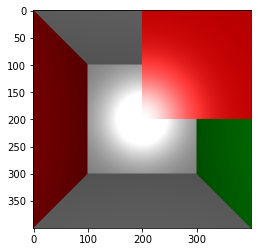

In [40]:
plt.imshow(image)